In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


In [3]:
x = pd.read_csv("/home/vasu/Downloads/fashion-mnist_train.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]

print X.shape,y.shape

(60000, 784) (60000,)


In [4]:
X_train = X.reshape((60000,28,28,1))

# one-hot encoding
Y_train = np_utils.to_categorical(y)

print X_train.shape, Y_train.shape

(60000, 28, 28, 1) (60000, 10)


In [5]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8, (5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
__________

In [6]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
hist = model.fit(X_train,Y_train,
                 epochs = 10,
                 shuffle = True,
                 batch_size = 256,
                 validation_split=0.20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 63s 1ms/step - loss: 0.7648 - acc: 0.7258 - val_loss: 0.5370 - val_acc: 0.8107
Epoch 2/10
48000/48000 [==============================] - 68s 1ms/step - loss: 0.4425 - acc: 0.8415 - val_loss: 0.4038 - val_acc: 0.8651
Epoch 3/10
48000/48000 [==============================] - 64s 1ms/step - loss: 0.3642 - acc: 0.8699 - val_loss: 0.3735 - val_acc: 0.8760
Epoch 4/10
48000/48000 [==============================] - 64s 1ms/step - loss: 0.3303 - acc: 0.8819 - val_loss: 0.3438 - val_acc: 0.8869
Epoch 5/10
48000/48000 [==============================] - 59s 1ms/step - loss: 0.3012 - acc: 0.8919 - val_loss: 0.3168 - val_acc: 0.8939
Epoch 6/10
48000/48000 [==============================] - 60s 1ms/step - loss: 0.2835 - acc: 0.8984 - val_loss: 0.3152 - val_acc: 0.8936
Epoch 7/10
48000/48000 [==============================] - 62s 1ms/step - loss: 0.2667 - acc: 0.9033 - val_loss: 0.3026 - val_acc

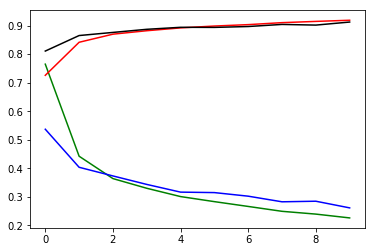

In [8]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()